# Natural Language Processing Course 
## Assignment #1
### Parnian Fazel

## Step #1

In [50]:
from collections import Counter
import re, collections
from operator import itemgetter
import requests

You can set the parameter number of merges in vocabulary in this part:

In [51]:
number_of_metges = 10

In [52]:
def read_corpus(file_name):
    f = open(file_name)
    words_list = f.read().split()
    return words_list
all_words_in_corpus_list = read_corpus("corpus.txt")
all_words_in_corpus_list

['low',
 'low',
 'low',
 'low',
 'low',
 'lower',
 'lower',
 'widest',
 'widest',
 'widest',
 'newest',
 'newest',
 'newest',
 'newest',
 'newest',
 'newest',
 'happier',
 'happier']

In [53]:
def get_word_freqs(words_list):
    return dict(Counter(words_list))
freqs = get_word_freqs(all_words_in_corpus_list)
freqs

{'low': 5, 'lower': 2, 'widest': 3, 'newest': 6, 'happier': 2}

In [54]:
def prepare_vocabulary(freqs):
    word_freq = dict()
    for word, freq in freqs.items():
        word_freq[" ".join(list(word)) + " </w>"] = freq
    return word_freq
word_freq = prepare_vocabulary(freqs)
word_freq

{'l o w </w>': 5,
 'l o w e r </w>': 2,
 'w i d e s t </w>': 3,
 'n e w e s t </w>': 6,
 'h a p p i e r </w>': 2}

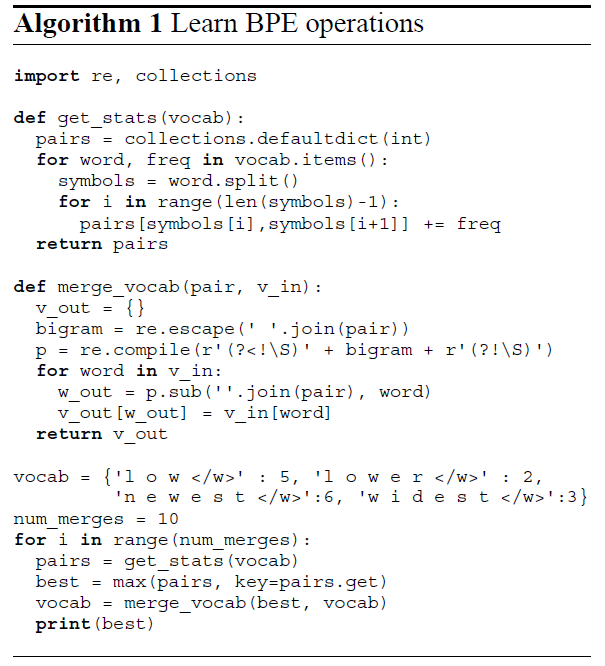

In [55]:
def get_stats(word_freq):
    pairs = collections.defaultdict(int)
    for word, frequency in word_freq.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pair = (symbols[i], symbols[i + 1])
            pairs[pair] += frequency
    return pairs

def merge_vocab(pair, vocab):
#     print(f"vocab: {vocab}")
    new_vocab = {}
    bigram = re.escape(' '.join(pair))
    expression = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in vocab:
        new_word = re.sub(expression, ''.join(pair), word)
        new_vocab[new_word] = vocab[word]
#     print(f"new_vocab: {new_vocab}")
    return new_vocab

In [56]:
def train(word_freq):
    all_merges = {}
    for i in range(number_of_metges):
        pair_stats = get_stats(word_freq)
        if not pair_stats:
            print("Reached maximum iterations")
            break
        best_pair = max(pair_stats, key=pair_stats.get)
        all_merges[best_pair] = i
        print(f"Most frequent pair at iteration {i}: {best_pair}")
        word_freq = merge_vocab(best_pair, word_freq)

    print(f"Final Vocabulary: {word_freq}")
    return all_merges
all_merges = train(word_freq)

Most frequent pair at iteration 0: ('e', 's')
Most frequent pair at iteration 1: ('es', 't')
Most frequent pair at iteration 2: ('est', '</w>')
Most frequent pair at iteration 3: ('l', 'o')
Most frequent pair at iteration 4: ('lo', 'w')
Most frequent pair at iteration 5: ('n', 'e')
Most frequent pair at iteration 6: ('ne', 'w')
Most frequent pair at iteration 7: ('new', 'est</w>')
Most frequent pair at iteration 8: ('low', '</w>')
Most frequent pair at iteration 9: ('e', 'r')
Final Vocabulary: {'low</w>': 5, 'low er </w>': 2, 'w i d est</w>': 3, 'newest</w>': 6, 'h a p p i er </w>': 2}


In [57]:
def encode(original_word, all_merges):
    if len(original_word) == 1:
        return original_word

    test_words = {original_word: 1}
    test_words = prepare_vocabulary(test_words)
    
    while True:
        candidate_pairs = []
        pairs = get_stats(test_words)
        for pair in pairs:
            if pair in all_merges:
                candidate_pairs.append((pair, all_merges[pair]))
        print(f"candidates: {candidate_pairs}")
        if len(candidate_pairs) == 0:
            break
        best_pair = min(candidate_pairs, key=itemgetter(1))[0]
        print(f"pair to merge: {best_pair}")
        test_words = merge_vocab(best_pair, test_words)

    return test_words

In [58]:
original_word = 'lowest'
encode(original_word, all_merges)

candidates: [(('l', 'o'), 3), (('e', 's'), 0)]
pair to merge: ('e', 's')
candidates: [(('l', 'o'), 3), (('es', 't'), 1)]
pair to merge: ('es', 't')
candidates: [(('l', 'o'), 3), (('est', '</w>'), 2)]
pair to merge: ('est', '</w>')
candidates: [(('l', 'o'), 3)]
pair to merge: ('l', 'o')
candidates: [(('lo', 'w'), 4)]
pair to merge: ('lo', 'w')
candidates: []


{'low est</w>': 1}

As we it is expected the word "lowest" is broken down into subwords which are in vocabulary which is "low" and "est"

In [59]:
# !pip install tokenizers

---------------
# Step #2 With HuggingFace

Importing needed libraries and pachages:

In [60]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.models import WordPiece
from tokenizers.trainers import WordPieceTrainer

## For the sample text in the box
\* The text of the tex-box is in the Sample.txt.

### BPE

In [61]:
bpe_text_box_tokenizer = Tokenizer(BPE())
bpe_text_box_tokenizer.pre_tokenizer = Whitespace()
bpe_text_box_trainer = BpeTrainer()
files = [f"./Sample.txt"]
bpe_text_box_tokenizer.train(files, bpe_text_box_trainer)
bpe_text_box_tokenizer.save("./BPE-text-box.json")
print(f"The number of extracted tokens(BPE - TextBox): {bpe_text_box_tokenizer.get_vocab_size()}")
print(f"------------------------------------------------------------")
print(f"The extracted tokens(BPE - TextBox): {bpe_text_box_tokenizer.get_vocab()}")

The number of extracted tokens(BPE - TextBox): 113
------------------------------------------------------------
The extracted tokens(BPE - TextBox): {'L': 4, 'deep': 57, 'rst': 86, 'ial': 80, 'z': 31, 'ted': 88, 'ing': 45, 'tu': 87, 'co': 72, 'en': 33, 'ine': 91, 'u': 27, 'r': 24, 'We': 66, 'io': 41, 's': 25, 'k': 18, 'tokens': 95, 'much': 106, 'iz': 43, 'ch': 49, '😍': 32, 'comparing': 111, 'p': 23, 'il': 78, '.': 1, 'This': 98, 'ken': 36, 'ization': 48, 'N': 5, 'pip': 85, 'a': 9, 'P': 6, 'b': 10, 'in': 34, 'oken': 37, 'ear': 51, 'by': 70, 'c': 11, 'Tokenization': 99, 'mu': 83, 'g': 15, 'ip': 79, 'fi': 76, 'eline': 101, 'Th': 64, 'x': 29, 'erated': 102, 'ated': 92, 'aring': 93, 'er': 74, 'each': 75, 'tokenization': 58, 'LP': 62, 'ed': 50, 'T': 7, 'Excited': 110, 't': 26, 'y': 30, 'is': 42, 'Exci': 97, 'be': 69, 'tutor': 108, 'f': 14, 'ning': 54, 'd': 12, 'first': 103, 'Ex': 61, 'he': 52, 'the': 56, '!': 0, 'mp': 82, 'atio': 46, 'pipeline': 107, 'el': 73, 'tutorial': 112, 'de': 39, 'tok

### WordPiece

In [62]:
wp_text_box_tokenizer = Tokenizer(WordPiece())
wp_text_box_tokenizer.pre_tokenizer = Whitespace()
wp_text_box_trainer = WordPieceTrainer()
files = [f"./Sample.txt"]
wp_text_box_tokenizer.train(files, wp_text_box_trainer)
wp_text_box_tokenizer.save("./WordPiece-text-box.json")
print(f"The number of extracted tokens(WordPiece - TextBox): {wp_text_box_tokenizer.get_vocab_size()}")
print(f"------------------------------------------------------------")
print(f"The extracted tokens(WordPiece - TextBox): {wp_text_box_tokenizer.get_vocab()}")

The number of extracted tokens(WordPiece - TextBox): 139
------------------------------------------------------------
The extracted tokens(WordPiece - TextBox): {'will': 132, 'model': 127, '##ine': 115, 'f': 14, 'tutorial': 138, 'w': 28, '##ted': 107, '##y': 45, 'h': 16, 'token': 61, 'learning': 81, 'g': 15, '##pel': 114, '##ep': 62, '##g': 54, 'o': 22, '##ch': 76, 'ea': 92, 'wi': 101, '##ria': 111, 'comparing': 135, 'NLP': 120, 'm': 20, 'e': 13, '##k': 40, 'tuto': 131, 'th': 73, 'a': 9, '##r': 49, '##ok': 58, 'gen': 94, '?!': 83, '##del': 108, '##in': 57, 'We': 88, '##ing': 66, '##iz': 64, '##a': 43, 'the': 82, '##is': 105, 'T': 7, '##izatio': 68, '.': 1, 'Th': 86, '##en': 56, '##p': 53, '##!': 55, 'mu': 97, 'd': 12, 'de': 70, 'co': 91, 's': 25, '##to': 106, '##s': 48, 'pipel': 129, 'each': 124, 'pi': 98, 'N': 5, '##ci': 103, 'Excited': 134, '##ization': 69, '##u': 46, '##e': 33, '##x': 34, '##oken': 60, 'i': 17, 'first': 125, 'p': 23, 'z': 31, 'fi': 93, 'in': 95, 'be': 89, '##el': 75

---------------
## For the Gutenberg book:

In [63]:
url = "http://www.gutenberg.org/cache/epub/16457/pg16457.txt"
gutemberg_file = requests.get(url, allow_redirects=True).content
open('./gutenberg.txt', 'wb').write(gutemberg_file);

### BPE

In [64]:
bpe_gutenberg_tokenizer = Tokenizer(BPE())
bpe_gutenberg_tokenizer.pre_tokenizer = Whitespace()
bpe_gutenberg_trainer = BpeTrainer(special_tokens=["[UNK]"])
gutenberg_files = [f"./gutenberg.txt"]
bpe_gutenberg_tokenizer.train(gutenberg_files, bpe_gutenberg_trainer)
bpe_gutenberg_tokenizer.save("./BPE-gutenberg.json")
print(f"The number of extracted tokens(BPE - Gutenberg Book): {bpe_gutenberg_tokenizer.get_vocab_size()}")
# print(f"------------------------------------------------------------")
# print(f"The extracted tokens(BPE - Gutenberg Book): {bpe_gutenberg_tokenizer.get_vocab()}")

The number of extracted tokens(BPE - Gutenberg Book): 16533


### WordPiece

In [65]:
wp_gutenberg_tokenizer = Tokenizer(WordPiece())
wp_gutenberg_tokenizer.pre_tokenizer = Whitespace()
wp_gutenberg_trainer = WordPieceTrainer(special_tokens=["[UNK]"])
gutenberg_files = [f"./gutenberg.txt"]
wp_gutenberg_tokenizer.train(gutenberg_files, wp_gutenberg_trainer)
wp_gutenberg_tokenizer.save("./WordPiece-gutenberg.json")
print(f"The number of extracted tokens(WordPiece - Gutenberg Book): {wp_gutenberg_tokenizer.get_vocab_size()}")
# print(f"------------------------------------------------------------")
# print(f"The extracted tokens(WordPiece - Gutenberg Book): {wp_gutenberg_tokenizer.get_vocab()}")

The number of extracted tokens(WordPiece - Gutenberg Book): 17566


----------------
## For the English wiki:

### BPE

In [66]:
bpe_wiki_tokenizer = Tokenizer(BPE())
bpe_wiki_tokenizer.pre_tokenizer = Whitespace()
bpe_wiki_trainer = BpeTrainer(special_tokens=["[UNK]"], vocab_size=500000)
wiki_files = [f"wikitext-103-raw/wiki.{split}.raw" for split in ["test", "train", "valid"]]
bpe_wiki_tokenizer.train(wiki_files, bpe_wiki_trainer)
bpe_wiki_tokenizer.save("./BPE-wiki.json")
print(f"The number of extracted tokens(BPE - English wiki): {bpe_wiki_tokenizer.get_vocab_size()}")
# print(f"------------------------------------------------------------")
# print(f"The extracted tokens(BPE - English wiki): {bpe_wiki_tokenizer.get_vocab()}")

The number of extracted tokens(BPE - English wiki): 500000


### WordPiece

In [67]:
wp_wiki_tokenizer = Tokenizer(WordPiece())
wp_wiki_tokenizer.pre_tokenizer = Whitespace()
wp_wiki_trainer = WordPieceTrainer(special_tokens=["[UNK]"], vocab_size=500000)
wiki_files = [f"wikitext-103-raw/wiki.{split}.raw" for split in ["test", "train", "valid"]]
wp_wiki_tokenizer.train(wiki_files, wp_wiki_trainer)
wp_wiki_tokenizer.save("./WordPiece-wiki.json")
print(f"The number of extracted tokens(WordPiece - English wiki): {wp_wiki_tokenizer.get_vocab_size()}")
# print(f"------------------------------------------------------------")
# print(f"The extracted tokens(WordPiece - English wiki): {wp_wiki_tokenizer.get_vocab()}")

The number of extracted tokens(WordPiece - English wiki): 500000


-------------
## Apply models on the sample text box

In [68]:
text_box = open("Sample.txt", encoding="utf8").read()
text_box

'This is a deep learning tokenization tutorial. Tokenization is the first step in a deep learning NLP pipeline. We will be comparing the tokens generated by each tokenization model. Excited much?! 😍'

### BPE on Gutenberg book

In [69]:
bpe_gutenberg_output = bpe_gutenberg_tokenizer.encode(text_box)
print(bpe_gutenberg_output)
print(f"Tokens: {bpe_gutenberg_output.tokens}")

Encoding(num_tokens=54, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Tokens: ['This', 'is', 'a', 'deep', 'learning', 'to', 'ken', 'ization', 't', 'ut', 'or', 'ial', '.', 'T', 'ok', 'en', 'ization', 'is', 'the', 'first', 'step', 'in', 'a', 'deep', 'learning', 'N', 'L', 'P', 'pi', 'pe', 'line', '.', 'We', 'will', 'be', 'comparing', 'the', 'to', 'k', 'ens', 'generated', 'by', 'each', 'to', 'ken', 'ization', 'model', '.', 'Ex', 'c', 'ited', 'much', '?', '!']


### WordPiece on Gutenberg book

In [70]:
wp_gutenberg_output = wp_gutenberg_tokenizer.encode(text_box)
print(wp_gutenberg_output)
print(f"Tokens: {wp_gutenberg_output.tokens}")

Encoding(num_tokens=54, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Tokens: ['This', 'is', 'a', 'deep', 'learning', 'to', '##ken', '##ization', 't', '##ut', '##oria', '##l', '.', 'To', '##ken', '##ization', 'is', 'the', 'first', 'step', 'in', 'a', 'deep', 'learning', 'N', '##L', '##P', 'pip', '##el', '##ine', '.', 'We', 'will', 'be', 'comparing', 'the', 'to', '##ken', '##s', 'generated', 'by', 'each', 'to', '##ken', '##ization', 'model', '.', 'Ex', '##ci', '##ted', 'much', '?', '##!', '[UNK]']


### BPE on english wiki

In [71]:
bpe_wiki_output = bpe_wiki_tokenizer.encode(text_box)
print(bpe_wiki_output)
print(f"Tokens: {bpe_wiki_output.tokens}")

Encoding(num_tokens=40, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Tokens: ['This', 'is', 'a', 'deep', 'learning', 'token', 'ization', 'tutorial', '.', 'Token', 'ization', 'is', 'the', 'first', 'step', 'in', 'a', 'deep', 'learning', 'NL', 'P', 'pipeline', '.', 'We', 'will', 'be', 'comparing', 'the', 'tokens', 'generated', 'by', 'each', 'token', 'ization', 'model', '.', 'Excited', 'much', '?', '!']


### WordPiece on english wiki

In [72]:
wp_wiki_output = wp_wiki_tokenizer.encode(text_box)
print(wp_wiki_output)
print(f"Tokens: {wp_wiki_output.tokens}")

Encoding(num_tokens=40, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Tokens: ['This', 'is', 'a', 'deep', 'learning', 'token', '##ization', 'tutorial', '.', 'Token', '##ization', 'is', 'the', 'first', 'step', 'in', 'a', 'deep', 'learning', 'NL', '##P', 'pipeline', '.', 'We', 'will', 'be', 'comparing', 'the', 'tokens', 'generated', 'by', 'each', 'token', '##ization', 'model', '.', 'Excited', 'much', '[UNK]', '[UNK]']


# Step #3
## Apply models on Gutenberg book

In [73]:
gutenberg_text = open("./gutenberg.txt").read()
# gutenberg_text

### BPE on Gutenberg book

In [74]:
bpe_gutenberg_step3_output = bpe_gutenberg_tokenizer.encode(gutenberg_text)
print(bpe_gutenberg_step3_output)
# print(f"Tokens: {bpe_gutenberg_step3_output.tokens}")

Encoding(num_tokens=122778, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])


### WordPiece on Gutenberg book

In [75]:
wp_gutenberg_step3_output = wp_gutenberg_tokenizer.encode(gutenberg_text)
print(wp_gutenberg_step3_output)
# print(f"Tokens: {wp_gutenberg_step3_output.tokens}")

Encoding(num_tokens=122805, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])


### BPE on english wiki

In [76]:
bpe_wiki_step3_output = bpe_wiki_tokenizer.encode(gutenberg_text)
print(bpe_wiki_step3_output)
# print(f"Tokens: {bpe_wiki_step3_output.tokens}")

Encoding(num_tokens=127598, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])


### WordPiece on english wiki

In [77]:
wp_wiki_step3_output = wp_wiki_tokenizer.encode(gutenberg_text)
print(wp_wiki_step3_output)
# print(f"Tokens: {wp_wiki_step3_output.tokens}")

Encoding(num_tokens=124373, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
